# Guide

1. Business context
    What is hypothyroid disease? 
2. Business questions
    - Use the blood test to predict whether the person has hypothyroid or not
    - What is the main factor related to thyroid
3. Data pipeline
    - Where the data comes from? 
    - How the data is clean?
4. EDAs
    - Statistic about the data
5. Modelling
    - Random forest
6. Model interpretation
7. Summary and next steps

# 1. Background
## Thyroid disease

Hypothyroidism is a medical condition characterized by an underactive thyroid gland, which fails to produce an adequate amount of thyroid hormones. The thyroid gland, located in the front of the neck, plays a crucial role in regulating various metabolic processes in the body by producing hormones such as thyroxine (T4) and triiodothyronine (T3).

When the thyroid gland doesn't produce enough thyroid hormones, it can lead to a slowdown in metabolism and various other bodily functions. Hypothyroidism can result from several factors, including:

Autoimmune thyroiditis (Hashimoto's thyroiditis): This is the most common cause of hypothyroidism. It occurs when the body's immune system mistakenly attacks the thyroid gland, leading to inflammation and damage. As a result, the thyroid gland gradually loses its ability to produce thyroid hormones.

Thyroid surgery or radioactive iodine therapy: Treatment for hyperthyroidism (an overactive thyroid) may involve thyroid surgery to remove part or all of the thyroid gland, or radioactive iodine therapy to destroy thyroid tissue. These treatments can result in hypothyroidism if too much thyroid tissue is removed or destroyed.

Iodine deficiency: Iodine is an essential mineral required for the synthesis of thyroid hormones. In regions where there is insufficient dietary iodine intake, the thyroid gland may not be able to produce enough thyroid hormones, leading to hypothyroidism. However, iodine deficiency is rare in many developed countries due to iodized salt and other dietary sources of iodine.

Medications: Certain medications, such as lithium (used to treat bipolar disorder) and amiodarone (used to treat heart rhythm disorders), can interfere with thyroid function and lead to hypothyroidism.

Congenital hypothyroidism: Some infants are born with an underactive thyroid gland due to genetic defects or abnormal development of the thyroid gland during fetal development. This condition, known as congenital hypothyroidism, requires prompt treatment to prevent developmental delays and other complications.

The symptoms of hypothyroidism can vary widely and may include fatigue, weight gain, constipation, dry skin, hair loss, cold intolerance, muscle weakness, and depression. Diagnosis is typically made through blood tests that measure levels of thyroid-stimulating hormone (TSH) and thyroid hormones (T4 and T3). Treatment for hypothyroidism usually involves thyroid hormone replacement therapy, where synthetic thyroid hormones (levothyroxine) are taken orally to restore normal thyroid hormone levels and alleviate symptoms. Treatment is typically lifelong and requires regular monitoring to adjust medication dosages as needed.

## Hypothyroid data 

This is the data collected by Garvan Insitute in Sydney, Australia, in 1987. 
- Diagnostic: hypothyroid, negative.
- age:                             continuous,?.
- sex:                             M,F,?.
- on_thyroxine:                    f,t.
- query_on_thyroxine:              f,t.
- on_antithyroid_medication:       f,t.
- thyroid_surgery:                 f,t.
- query_hypothyroid:               f,t.
- query_hyperthyroid:              f,t.
- pregnant:                        f,t.
- sick:                            f,t.
- tumor:                           f,t.
- lithium:                         f,t.
- goitre:                          f,t.
- TSH_measured:                    f,t.
- TSH:                             continuous,?.
- T3_measured:                     f,t.
- T3:                              continuous,?.
- TT4_measured:                    f,t.
- TT4:                             continuous,?.
- T4U_measured:                    f,t.
- T4U:                             continuous,?.
- FTI_measured:                    f,t.
- FTI:                             continuous,?.
- TBG_measured:                    f,t.
- TBG:                             continuous,?.

# 2. EDA

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns

In [2]:
# Hearder of the columns were in another file.
header = ['diagnosis',
          'age',
        'sex',
        'on_thyroxine',
        'query_on_thyroxine',
        'on_antithyroid_medication',
        'thyroid_surgery',
        'query_hypothyroid',
        'query_hyperthyroid',
        'pregnant',
        'sick',
        'tumor',
        'lithium',
        'goitre',
        'TSH_measured',
        'TSH',
        'T3_measured',
        'T3',
        'TT4_measured',
        'TT4',
        'T4U_measured',
        'T4U',
        'FTI_measured',
        'FTI',
        'TBG_measured',
        'TBG']
df = pd.read_csv('hypothyroid.data', header=None )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
df.columns = header
df.head()

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   diagnosis                  3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [5]:
pd.set_option('display.max_columns', 26)
df.describe()

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [6]:
df.isna().sum()

diagnosis                    0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [7]:
df.shape

(3163, 26)

In [8]:
(df == "?").sum()

diagnosis                       0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

No NA data because all NA data is written as '?'. 
Need to remove or impute these data.

In [9]:
# Percentage of the cell being unknown

((df == "?").sum() / 3163) * 100

diagnosis                     0.000000
age                          14.100537
sex                           2.307936
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
thyroid_surgery               0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
pregnant                      0.000000
sick                          0.000000
tumor                         0.000000
lithium                       0.000000
goitre                        0.000000
TSH_measured                  0.000000
TSH                          14.796080
T3_measured                   0.000000
T3                           21.972811
TT4_measured                  0.000000
TT4                           7.872273
T4U_measured                  0.000000
T4U                           7.840658
FTI_measured                  0.000000
FTI                           7.809042
TBG_measured                  0.000000
TBG                      

In [10]:
df.groupby(by='diagnosis').age.describe()

,count,unique,top,freq
diagnosis,,,,
hypothyroid,151,51,?,15
negative,3012,92,?,431


In [11]:
# Changing the data type to numeric.
df.age = pd.to_numeric(df['age'], errors='coerce')

In [12]:
df.age.describe()

count    2717.000000
mean       51.154214
std        19.294405
min         1.000000
25%        35.000000
50%        54.000000
75%        67.000000
max        98.000000
Name: age, dtype: float64

In [13]:
df[df.age == 1]

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
424,negative,1.0,M,t,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,3.10
2456,negative,1.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.60,y,110,y,0.77,y,143,n,?
2617,negative,1.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.20,y,65,y,0.89,y,73,n,?
2700,negative,1.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.50,y,100,y,0.93,y,107,n,?


Hypothyroidism can happen to infant as well. So, 1 year old is not uncommon. 

In [14]:
df.age.isna().sum()

446

In [15]:
df.groupby(by=['diagnosis']).sex.value_counts()

diagnosis    sex
hypothyroid  F       111
             M        38
             ?         2
negative     F      2071
             M       870
             ?        71
Name: count, dtype: int64

In [16]:
df.groupby(by=['diagnosis','sex']).age.describe()

count       mean        std   min   25%   50%   75%   max
diagnosis   sex                                                            
hypothyroid ?       0.0        NaN        NaN   NaN   NaN   NaN   NaN   NaN
            F     103.0  54.038835  21.057774   5.0  37.5  59.0  71.0  88.0
            M      33.0  55.090909  15.530944  24.0  43.0  60.0  71.0  77.0
negative    ?      17.0  40.705882  15.086272  16.0  32.0  42.0  47.0  65.0
            F    1806.0  50.961794  19.348966   1.0  34.0  53.0  67.0  98.0
            M     758.0  51.283641  19.075115   1.0  37.0  55.0  65.0  89.0

In [17]:
# Get rid of unknown sex. It only occupies 2.3% of the data.
df = df[df['sex'] != '?']
df.shape

(3090, 26)

In [18]:
df.groupby(by=['diagnosis']).sex.value_counts()

diagnosis    sex
hypothyroid  F       111
             M        38
negative     F      2071
             M       870
Name: count, dtype: int64

In [19]:
# The majority of TBG values are not measured. Therefore, better remove it. 
df = df.drop(columns=['TBG'])
df.shape

(3090, 25)

In [20]:
df.groupby(by='TSH_measured').TSH.describe()

,count,unique,top,freq
TSH_measured,,,,
n,456,1,?,456
y,2634,234,0,879


TSH values only appear in the people that get their TSH measured 
The same applies to other values.
Since TSH is a numeric, turn the data to numeric and then remove NA.  

In [21]:
df.groupby(by='T3_measured').T3.describe()

,count,unique,top,freq
T3_measured,,,,
n,683,1,?,683
y,2407,68,1.80,140


In [22]:
# Changing these columns to numeric.
columns_to_numeric = ['TSH','T3','TT4','T4U','FTI']

for i in columns_to_numeric:
    #print(i)
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3090 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   diagnosis                  3090 non-null   object 
 1   age                        2700 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3090 non-null   object 
 4   query_on_thyroxine         3090 non-null   object 
 5   on_antithyroid_medication  3090 non-null   object 
 6   thyroid_surgery            3090 non-null   object 
 7   query_hypothyroid          3090 non-null   object 
 8   query_hyperthyroid         3090 non-null   object 
 9   pregnant                   3090 non-null   object 
 10  sick                       3090 non-null   object 
 11  tumor                      3090 non-null   object 
 12  lithium                    3090 non-null   object 
 13  goitre                     3090 non-null   object 
 1

In [24]:
df.isna().sum()

diagnosis                      0
age                          390
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          456
T3_measured                    0
T3                           683
TT4_measured                   0
TT4                          244
T4U_measured                   0
T4U                          243
FTI_measured                   0
FTI                          242
TBG_measured                   0
dtype: int64

In [25]:
df.groupby(by='diagnosis').age.describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
hypothyroid,136.0,54.294118,19.809507,5.0,40.75,59.5,71.0,88.0
negative,2564.0,51.056942,19.265256,1.0,34.00,54.0,67.0,98.0


In [26]:
df.groupby(by='diagnosis').age.median()

diagnosis
hypothyroid    59.5
negative       54.0
Name: age, dtype: float64

In [27]:
#Impute the age of unknown data with the median age of people in the diagnostic group. 
group_age_median = df.groupby(by='diagnosis')['age'].transform('median')
df['age'] = df['age'].fillna(group_age_median)
df.groupby(by='diagnosis').age.describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
hypothyroid,149.0,54.748322,18.976837,5.0,42.0,59.5,69.0,88.0
negative,2941.0,51.434206,18.014587,1.0,37.0,54.0,64.0,98.0


<Axes: xlabel='diagnosis', ylabel='age'>

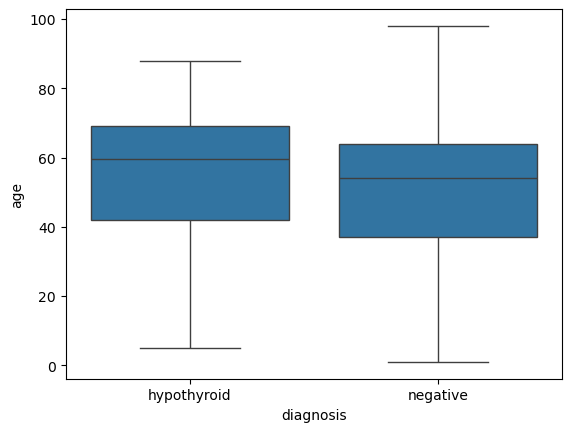

In [28]:
# Check if the median the age did not change much after impute.
sns.boxplot(data=df, x='diagnosis',y='age')

In [29]:
df.isna().sum()

diagnosis                      0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          456
T3_measured                    0
T3                           683
TT4_measured                   0
TT4                          244
T4U_measured                   0
T4U                          243
FTI_measured                   0
FTI                          242
TBG_measured                   0
dtype: int64

In [30]:
df.shape

(3090, 25)

In [31]:
df = df.dropna(axis=0)
df.shape

(2338, 25)

In [32]:
df.describe(include='all')

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,2338,2338.000000,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338.000000,2338,2338.000000,2338,2338.000000,2338,2338.000000,2338,2338.000000,2338
unique,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,2
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n
freq,2203,NaN,1594,2061,2312,2308,2257,2164,2184,2286,2245,2311,2336,2281,2338,NaN,2338,NaN,2338,NaN,2338,NaN,2338,NaN,2334
mean,NaN,53.707656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.003700,NaN,1.913345,NaN,106.645552,NaN,0.983037,NaN,109.938580,NaN
std,NaN,17.857953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.572168,NaN,0.952338,NaN,44.263718,NaN,0.226437,NaN,40.849049,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.400000,NaN,82.000000,NaN,0.850000,NaN,90.000000,NaN
50%,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,NaN,1.800000,NaN,102.000000,NaN,0.960000,NaN,107.000000,NaN
75%,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200000,NaN,2.300000,NaN,125.000000,NaN,1.060000,NaN,126.000000,NaN


In [33]:
df.groupby(by='diagnosis')['sex'].value_counts()

diagnosis    sex
hypothyroid  F       100
             M        35
negative     F      1494
             M       709
Name: count, dtype: int64

In [34]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
negative       0.942258
hypothyroid    0.057742
Name: proportion, dtype: float64

In [35]:
df.groupby(by='diagnosis')['sex'].value_counts(normalize=True)

diagnosis    sex
hypothyroid  F      0.740741
             M      0.259259
negative     F      0.678166
             M      0.321834
Name: proportion, dtype: float64

In [36]:
# Changing the dianosis value
df['diagnosis'] = df['diagnosis'].map({'hypothyroid':1, 'negative':0})
df.head()

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,1,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,1,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,1,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,1,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [37]:
df.sex.value_counts(normalize=True)

sex
F    0.681779
M    0.318221
Name: proportion, dtype: float64

In [38]:
df.groupby(by='sex')['diagnosis'].value_counts(normalize=True)

sex  diagnosis
F    0            0.937265
     1            0.062735
M    0            0.952957
     1            0.047043
Name: proportion, dtype: float64

[[Text(0, 0, 'negative'), Text(1, 0, 'hypothyroid')]]

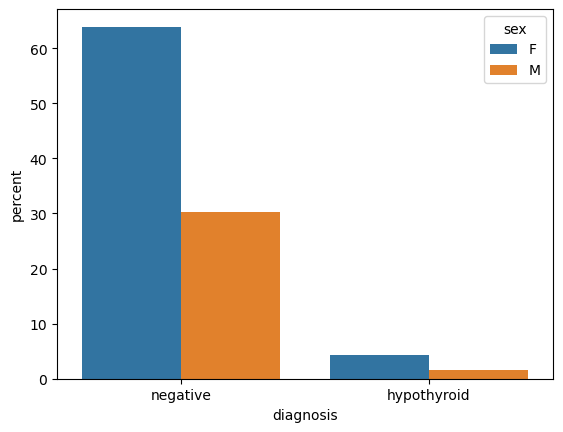

In [39]:
ax = sns.countplot(df, x='diagnosis', hue='sex', stat='percent')
ax.set(xticklabels=['negative','hypothyroid'])


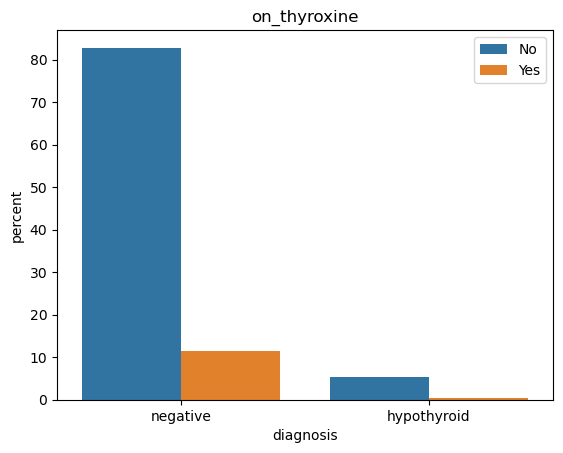

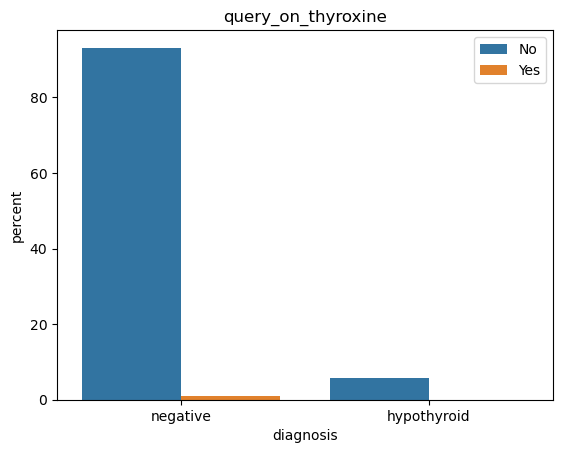

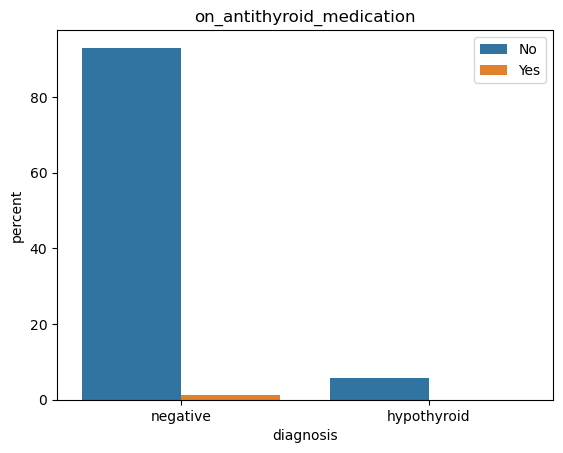

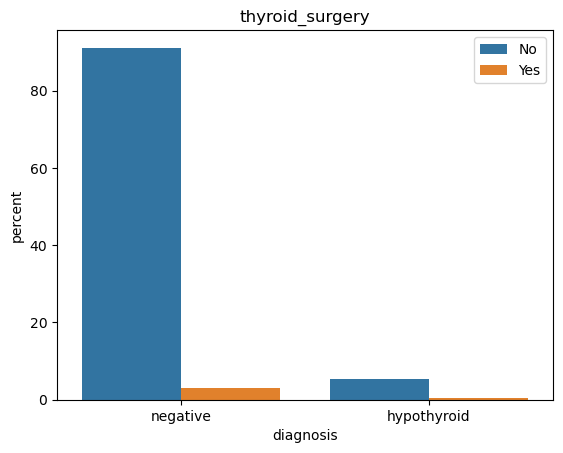

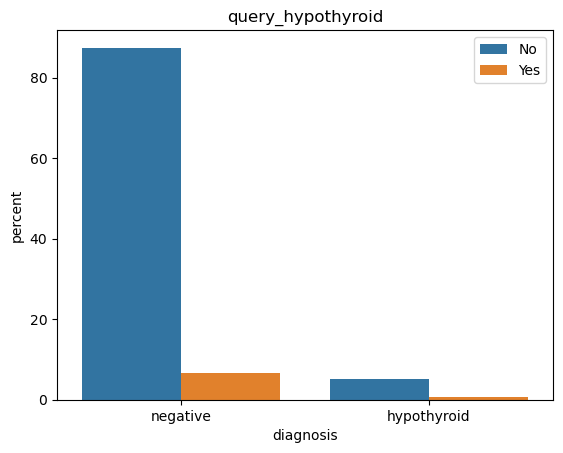

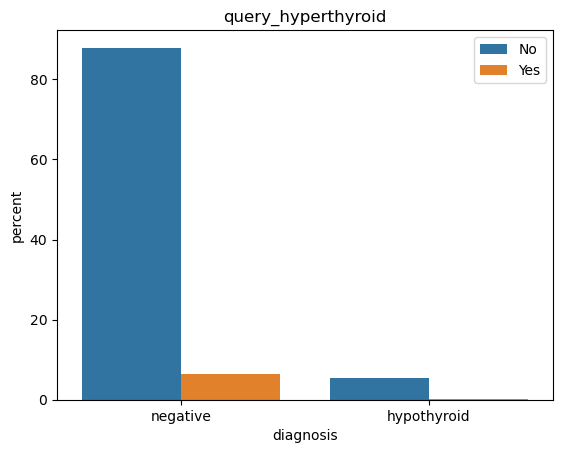

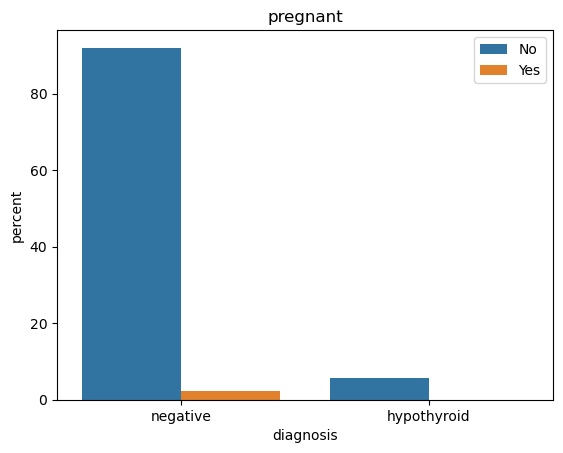

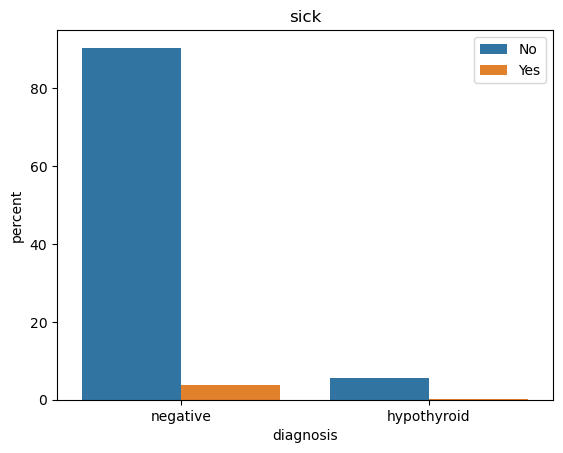

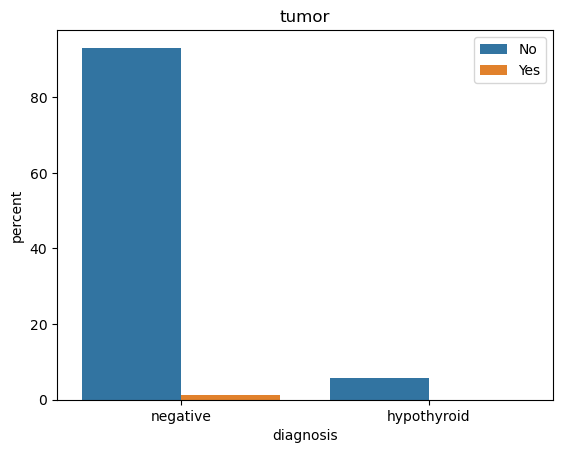

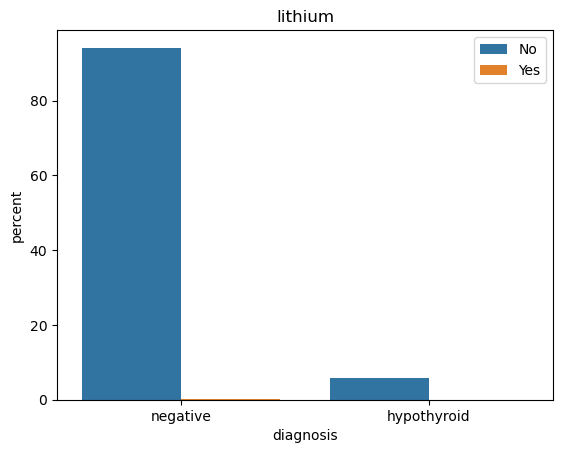

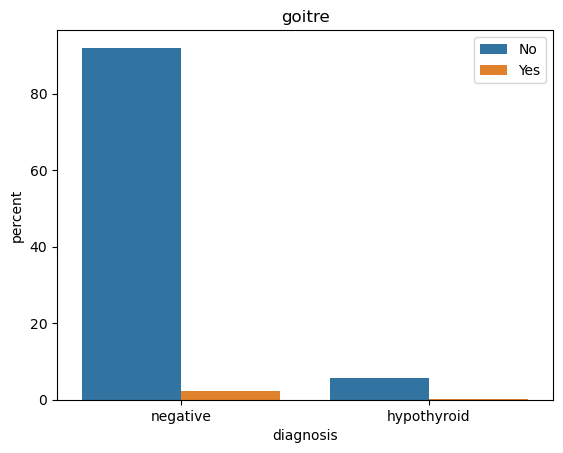

In [40]:
for_countplot = [
        'on_thyroxine',
        'query_on_thyroxine',
        'on_antithyroid_medication',
        'thyroid_surgery',
        'query_hypothyroid',
        'query_hyperthyroid',
        'pregnant',
        'sick',
        'tumor',
        'lithium',
        'goitre']

for f in for_countplot:
    ax = sns.countplot(df, x='diagnosis', hue=f, stat='percent')
    ax.set_xticklabels(labels=['negative','hypothyroid'])
    new_labels=['No','Yes']
    ax.legend(new_labels)
    ax.set_title(f)
    plt.show()

### Looking at Numeric data


In [41]:
df.describe()

,diagnosis,age,TSH,T3,TT4,T4U,FTI
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,0.057742,53.707656,6.003700,1.913345,106.645552,0.983037,109.938580
std,0.233304,17.857953,24.572168,0.952338,44.263718,0.226437,40.849049
min,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.400000,82.000000,0.850000,90.000000
50%,0.000000,54.000000,0.700000,1.800000,102.000000,0.960000,107.000000
75%,0.000000,67.000000,2.200000,2.300000,125.000000,1.060000,126.000000
max,1.000000,98.000000,530.000000,9.800000,450.000000,2.210000,485.000000


In [42]:
df[df.TSH == 530]

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
31,1,59.0,F,f,f,f,f,f,f,f,f,f,f,f,y,530.0,y,2.0,y,10.0,y,1.12,y,8.5,n


It seems that this is an outlier. 

In [43]:
df[df.T3 == 2.0]['TSH'].describe()

count    130.000000
mean       8.055000
std       47.119695
min        0.000000
25%        0.000000
50%        0.800000
75%        2.250000
max      530.000000
Name: TSH, dtype: float64

In [44]:
df[(df.T3 == 2.0) & (df.diagnosis == 1)]['TSH']

15      15.0
31     530.0
75      43.0
80      17.0
98      19.0
108     44.0
118     35.0
138     35.0
Name: TSH, dtype: float64

In [45]:
df[(df.T3 == 2.0) & (df.diagnosis == 1)]['TSH'].agg(['mean','median'])

mean      92.25
median    35.00
Name: TSH, dtype: float64

In [46]:
df[(df.T3 == 2.0) & (df.diagnosis == 1)]['TSH'].median()

35.0

Decided not to remove or do anything with the outlier.

<Axes: xlabel='TSH', ylabel='Count'>

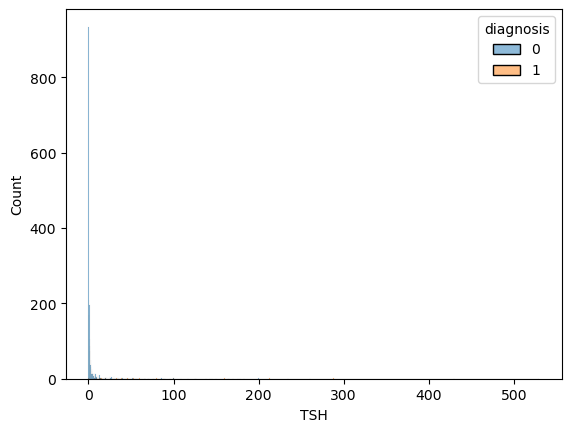

In [47]:
sns.histplot(x=df.TSH, hue=df.diagnosis)

There is a strong outlier. Need to remove it before plotting. 

<Axes: xlabel='TSH', ylabel='Count'>

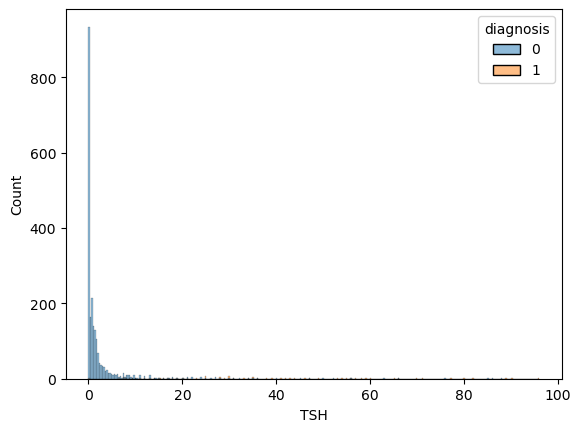

In [48]:
sns.histplot(x=df[df['TSH'] < 100]['TSH'], hue=df.diagnosis)

<Axes: xlabel='TSH', ylabel='Count'>

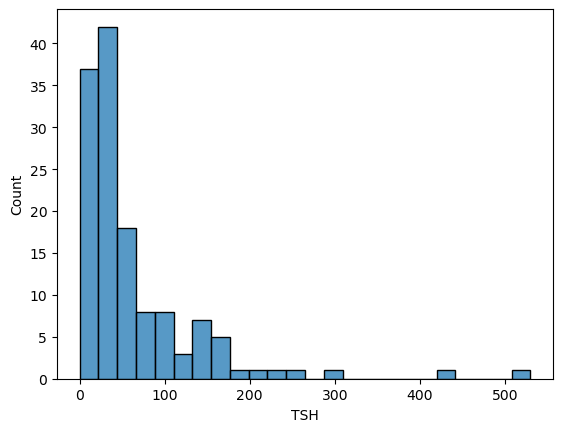

In [49]:
sns.histplot(x=df[df['diagnosis'] == 1]['TSH'])

<Axes: xlabel='diagnosis', ylabel='TSH'>

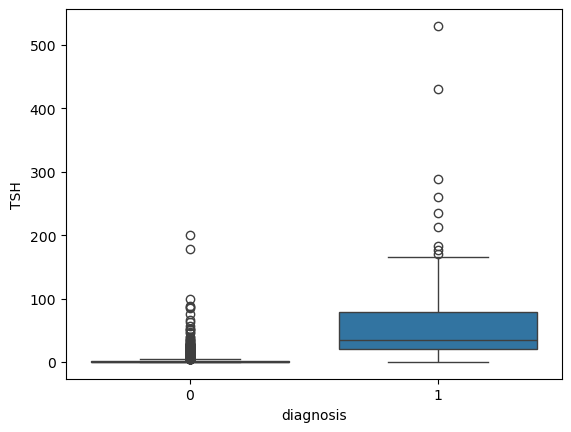

In [50]:
sns.boxplot(data=df,x='diagnosis', y='TSH')

Strong difference in the range in TSH between people with hypothyroidism and the one without.

<Axes: xlabel='diagnosis', ylabel='T3'>

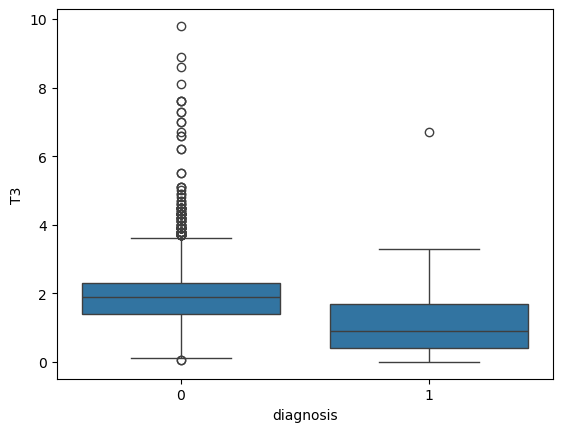

In [51]:
sns.boxplot(data=df,x='diagnosis', y='T3')

<Axes: xlabel='diagnosis', ylabel='TT4'>

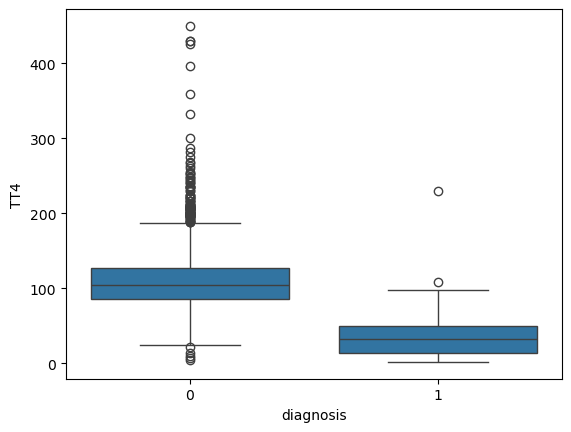

In [52]:
sns.boxplot(data=df,x='diagnosis', y='TT4')

<Axes: xlabel='diagnosis', ylabel='T4U'>

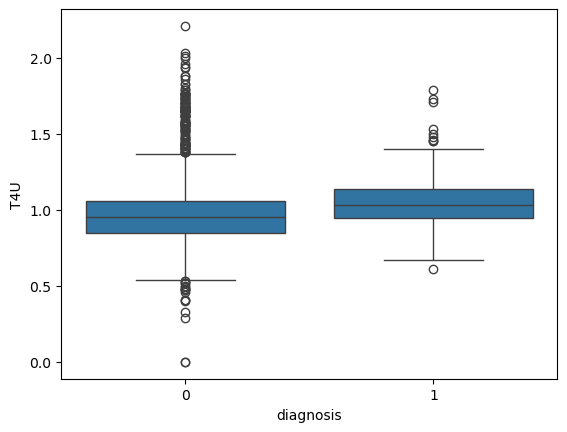

In [53]:
sns.boxplot(data=df,x='diagnosis', y='T4U')

<Axes: xlabel='diagnosis', ylabel='FTI'>

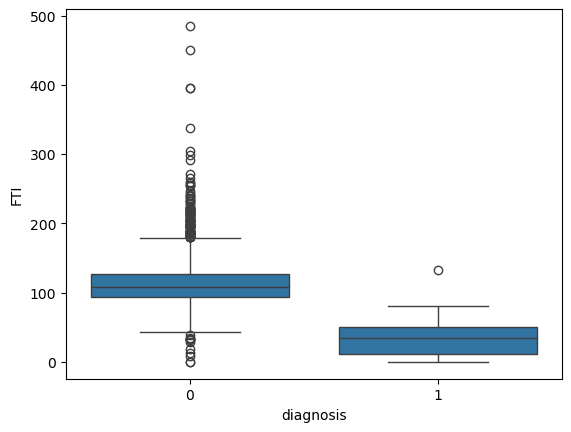

In [54]:
sns.boxplot(data=df,x='diagnosis', y='FTI')

In [55]:
df_numeric_corr = df[['TSH','T3','TT4','T4U','FTI']].corr()

<Axes: >

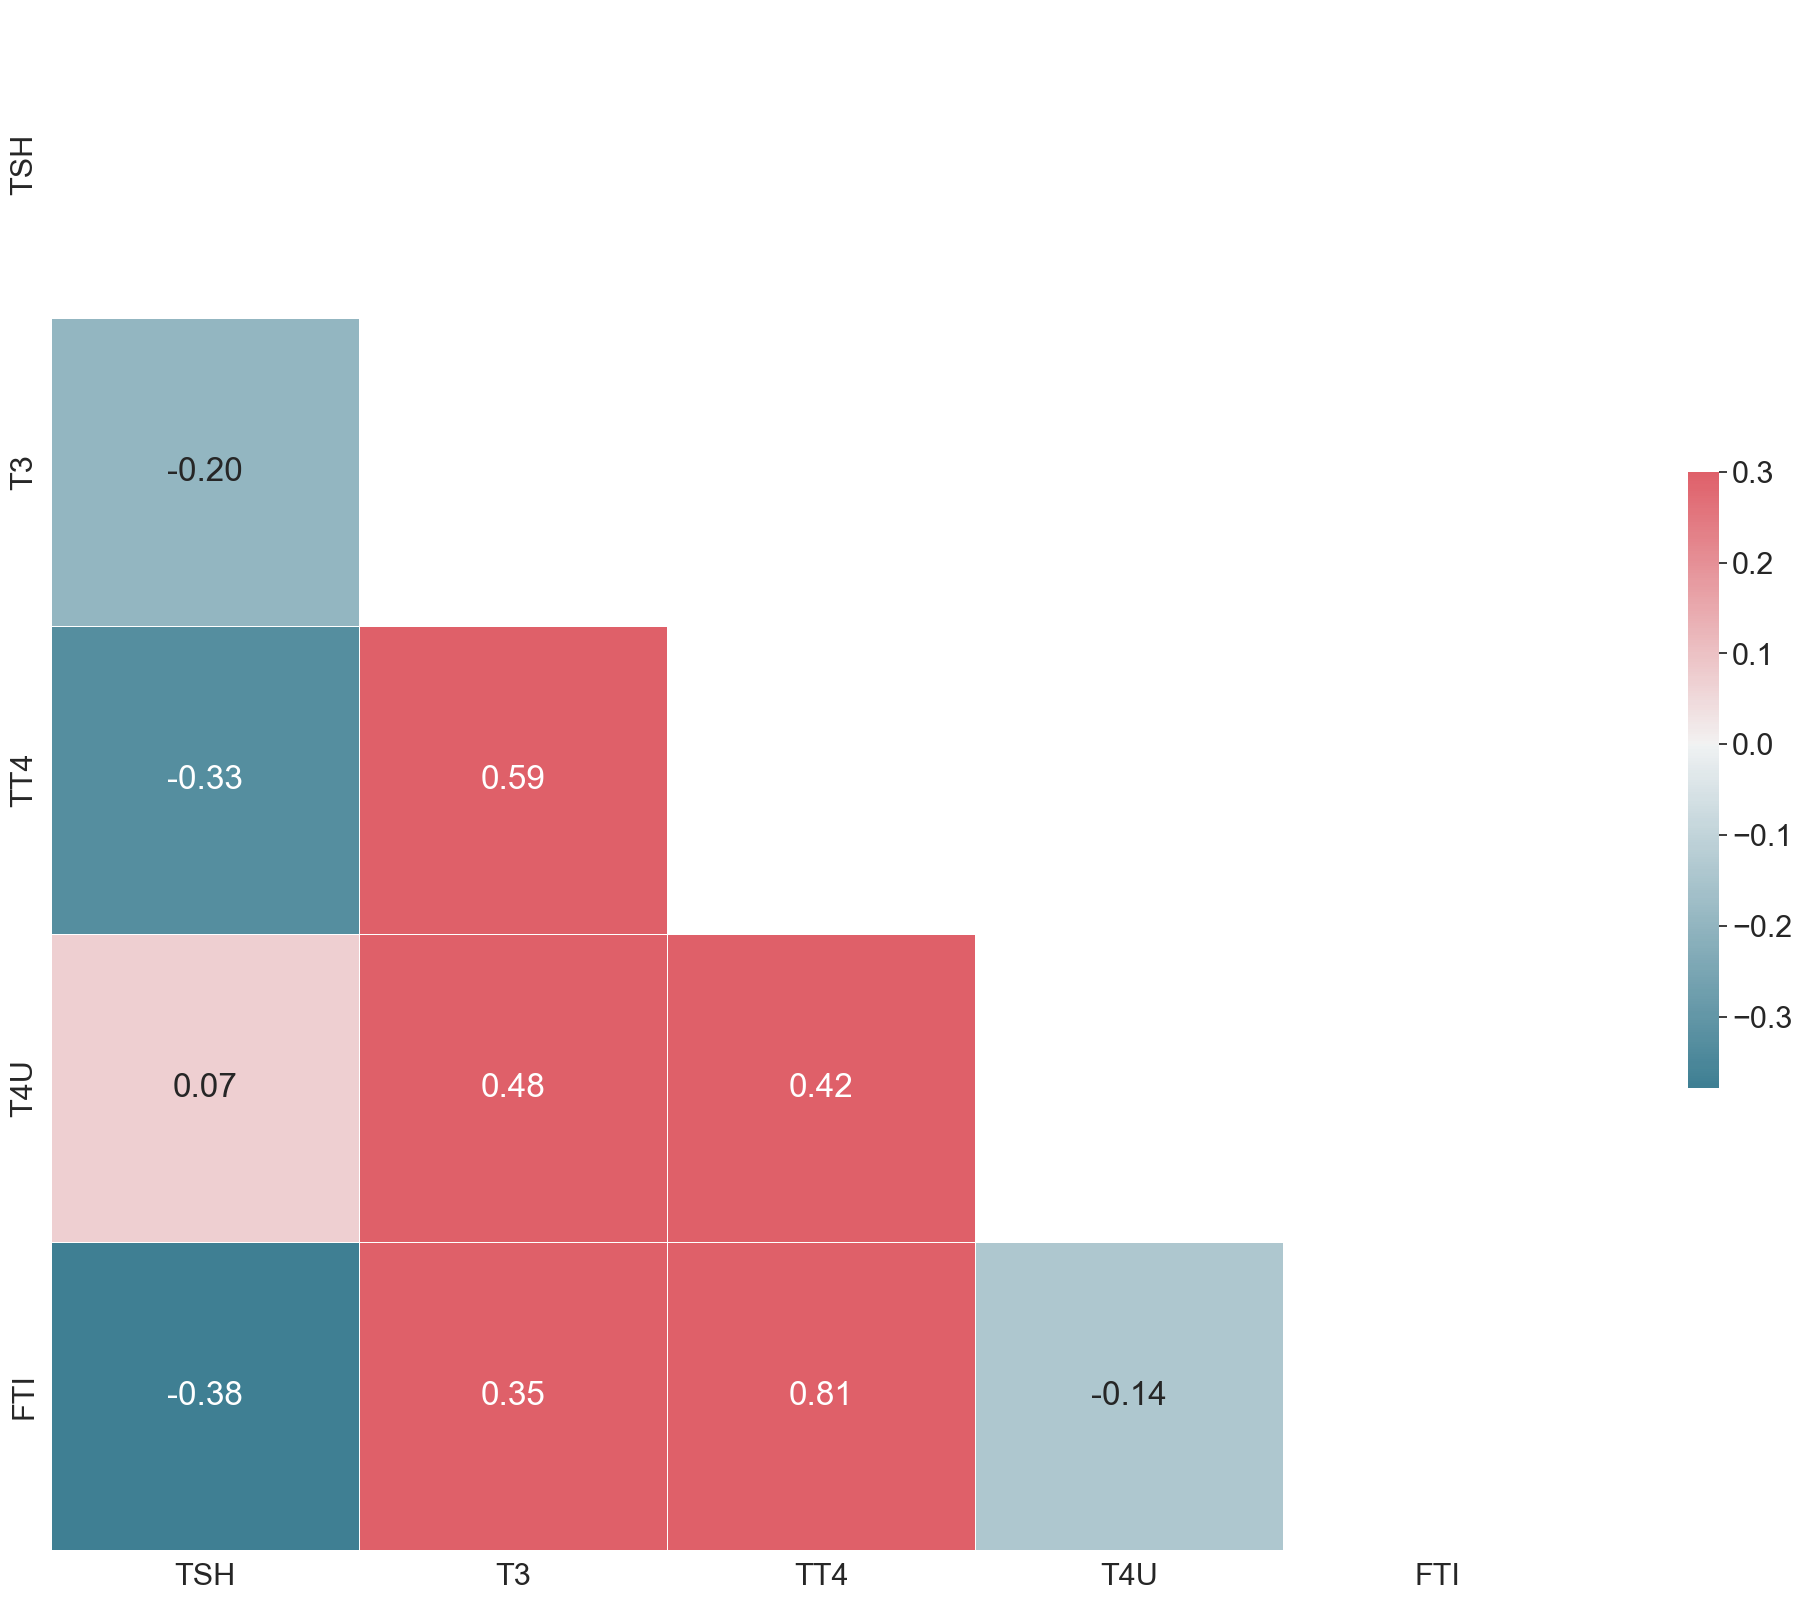

In [56]:
 #Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white", font_scale=2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_numeric_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(df_numeric_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4}, annot=True, fmt='.2f')

#plt.show()

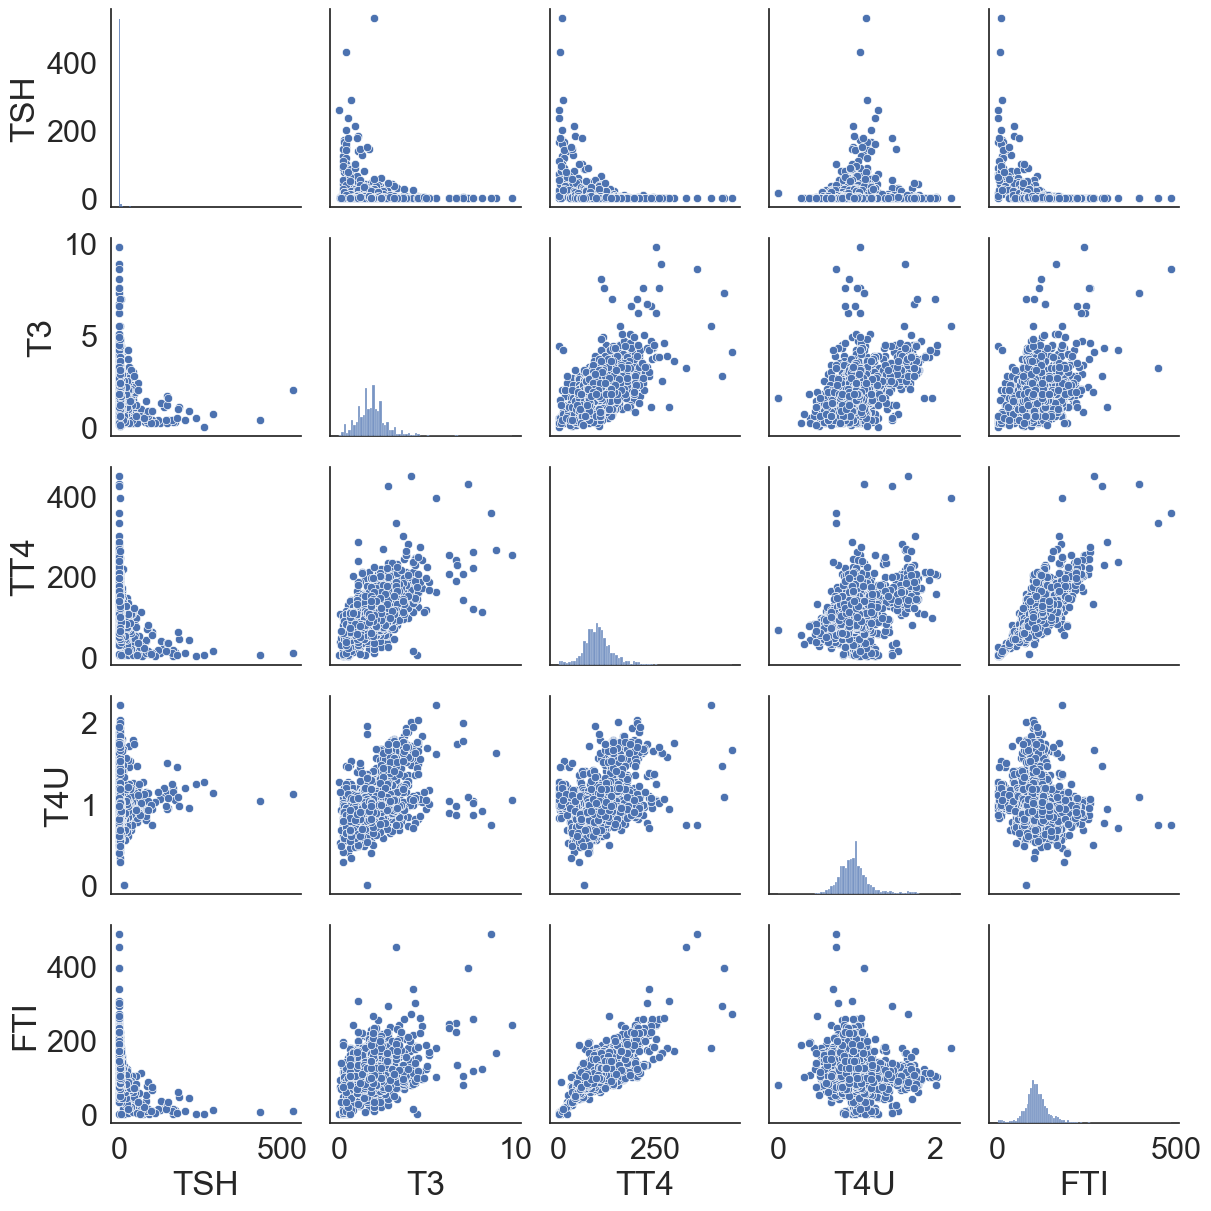

In [57]:
sns.pairplot(df[['TSH','T3','TT4','T4U','FTI']])

Outlier in nearly all data. 
Strong correlation between FTI and T3,FTI and TT4 

## 3. Building model

In [58]:
df.columns

Index(['diagnosis', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [59]:
df_for_model = df.copy()

In [60]:
df_for_model['sex'] = df_for_model['sex'].map({"M":0,"F":1})


In [61]:
df_for_model.head()

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,1,15.0,1,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,1,24.0,0,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,1,24.0,1,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,1,77.0,0,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [62]:
for_countplot

['on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre']

In [63]:
# changing all data to numeric
for f in for_countplot:
    df_for_model[f] = df_for_model[f].map({'f':0,'t':1})


In [64]:
df_for_model.head()

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [65]:
df_for_model.drop(columns=['TSH_measured','T3_measured',
                           'TT4_measured',
                            'T4U_measured',
                            'FTI_measured',
                            'TBG_measured',], inplace=True)

In [66]:
df_for_model.head()

,diagnosis,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [67]:
features = df_for_model.columns[df_for_model.columns != 'diagnosis']

In [68]:
features

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [69]:
outcome = 'diagnosis'

In [70]:
# Set train and test dataset.
X=df_for_model[features].copy()
y=df_for_model[outcome].astype(str).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 100666001,
                                                    stratify = y)

In [71]:
X_train.shape

(1753, 18)

In [72]:
y_train.shape

(1753,)

In [73]:
X_test.shape

(585, 18)

In [74]:
model = RandomForestClassifier(random_state=1)
print(model)

RandomForestClassifier(random_state=1)


In [75]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

## 4. Checking accuracy and ROC curve

In [76]:
# Evaluate model against training set
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = np.round(prediction)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()

In [77]:
y_train_prob = model.predict_proba(X_train)[:,1]

Accuracy : 1.0000 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 1.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 1.0000 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 1.0000                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


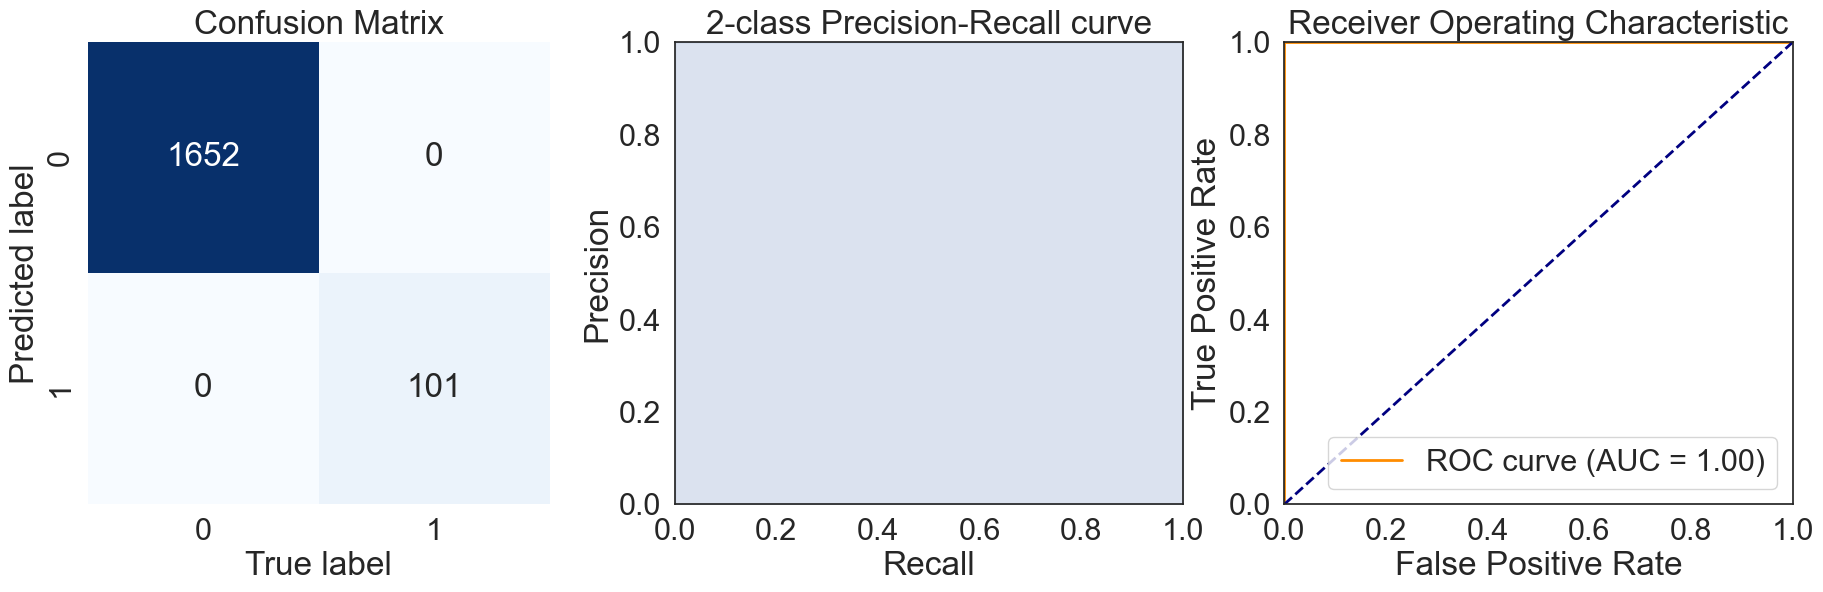

In [78]:
show_summary_report(y_train, y_train_prob)

The model seems to fit 100%. 

In [79]:
y_test_prob = model.predict_proba(X_test)[:,1]

In [80]:
y_test_prob

array([0.  , 0.  , 0.  , 0.01, 0.  , 0.98, 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.07, 0.  , 0.06, 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.  , 0.01,
       0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.04, 0.  , 0.01, 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.04, 0.  , 0.  , 0.  , 0.02,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.06, 0.  , 1.  ,
       0.  , 0.  , 0.  , 0.02, 0.  , 0.06, 0.  , 0.  , 0.  , 0.03, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.94, 0.  , 0.95, 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.01, 0.  , 0.1 , 0.  , 0.02, 0.  , 0.  , 0.  ,
       0.  , 0.78, 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.72, 0.

Accuracy : 0.9880 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.9355 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.8529 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9969                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


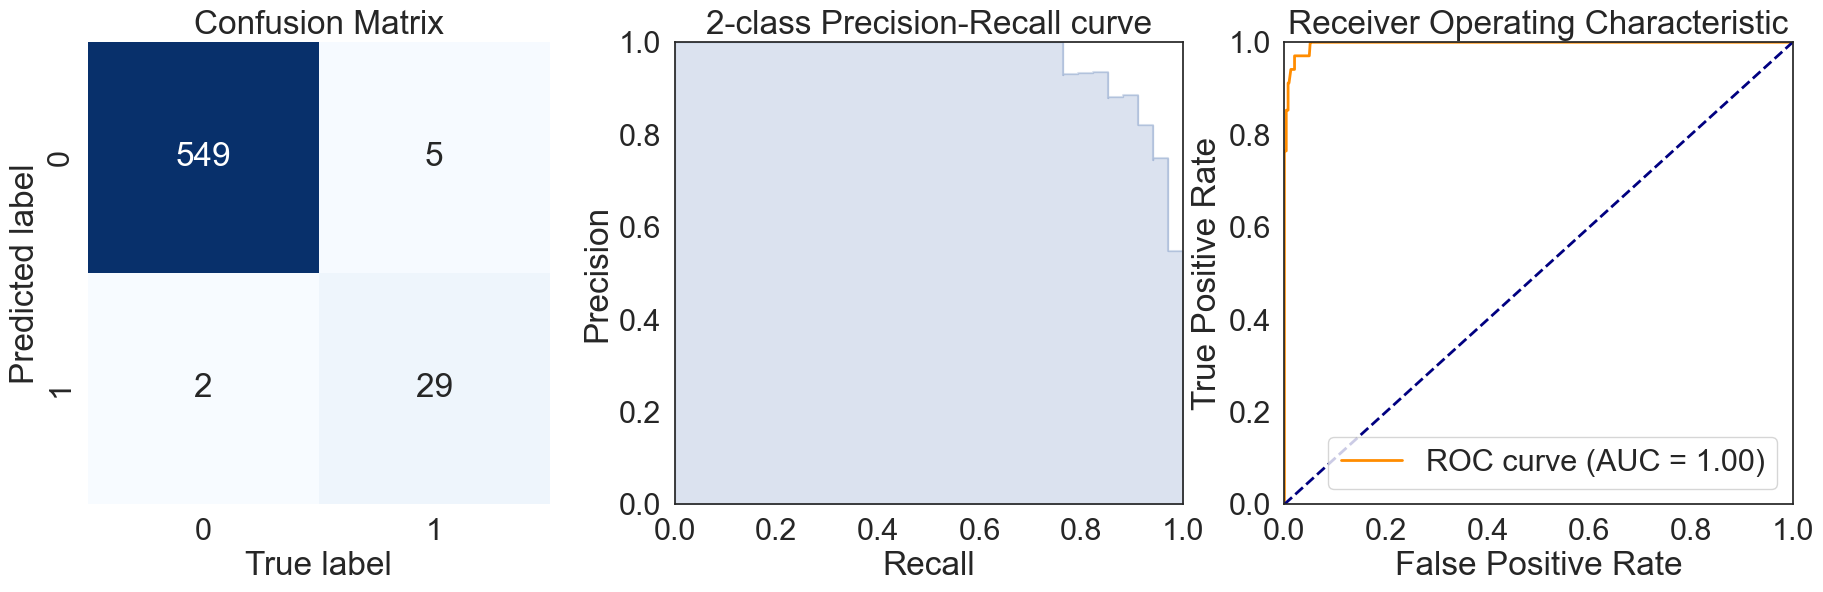

In [81]:
show_summary_report(y_test, y_test_prob)

For the testing set, the performance is slight lower. So, the data might be overfit. 

In [ ]:
features

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [ ]:
model.feature_importances_

array([4.23683846e-02, 3.70082651e-03, 7.11173738e-03, 1.00651574e-04,
       6.23475795e-03, 5.89190381e-03, 1.28180037e-02, 1.28419194e-03,
       2.53753637e-04, 3.44210463e-03, 5.29015867e-04, 0.00000000e+00,
       1.77931416e-03, 2.44563186e-01, 5.82427179e-02, 2.11627930e-01,
       3.91806638e-02, 3.60870856e-01])

In [89]:
important_factor = dict(zip(features, model.feature_importances_))
sorted_important_factor = sorted(important_factor.items(), key = lambda x:x[1], reverse = True)
converted_dict = dict(sorted_important_factor)
converted_dict

{'FTI': 0.36087085627259025,
 'TSH': 0.24456318635698357,
 'TT4': 0.2116279299178718,
 'T3': 0.05824271788839541,
 'age': 0.04236838461844461,
 'T4U': 0.03918066380896054,
 'query_hypothyroid': 0.0128180036726686,
 'on_thyroxine': 0.007111737382043629,
 'on_antithyroid_medication': 0.006234757951086437,
 'thyroid_surgery': 0.005891903811870479,
 'sex': 0.0037008265072689664,
 'sick': 0.0034421046302827493,
 'goitre': 0.001779314160952465,
 'query_hyperthyroid': 0.0012841919415616813,
 'tumor': 0.0005290158671786441,
 'pregnant': 0.00025375363742313864,
 'query_on_thyroxine': 0.00010065157441708834,
 'lithium': 0.0}

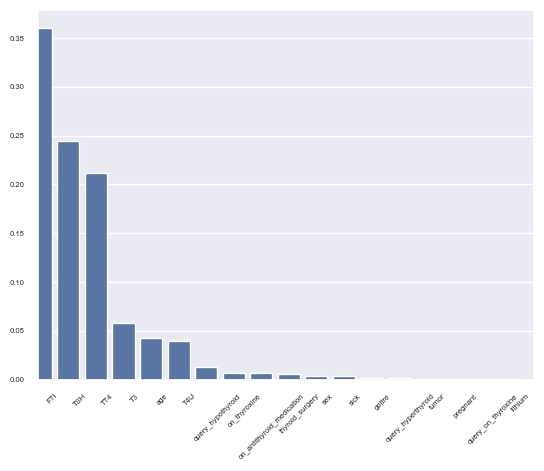

In [90]:
sns.set(font_scale=0.5)
sns.barplot(x=range(len(converted_dict)), y=list(converted_dict.values()), align='center')
plt.xticks(range(len(converted_dict)),list(converted_dict.keys()))
plt.xticks(rotation=45)
plt.show()

### Do GridSearch

In [83]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features':(3, 5), 
              'n_estimators':(200,1000)}

model_2 = RandomForestClassifier()
model_gs = GridSearchCV(model_2, parameters)
model_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': (3, 5), 'n_estimators': (200, 1000)})

In [84]:
model_gs.best_params_

{'max_features': 3, 'n_estimators': 200}

Accuracy : 0.9880 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.9355 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.8529 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9966                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


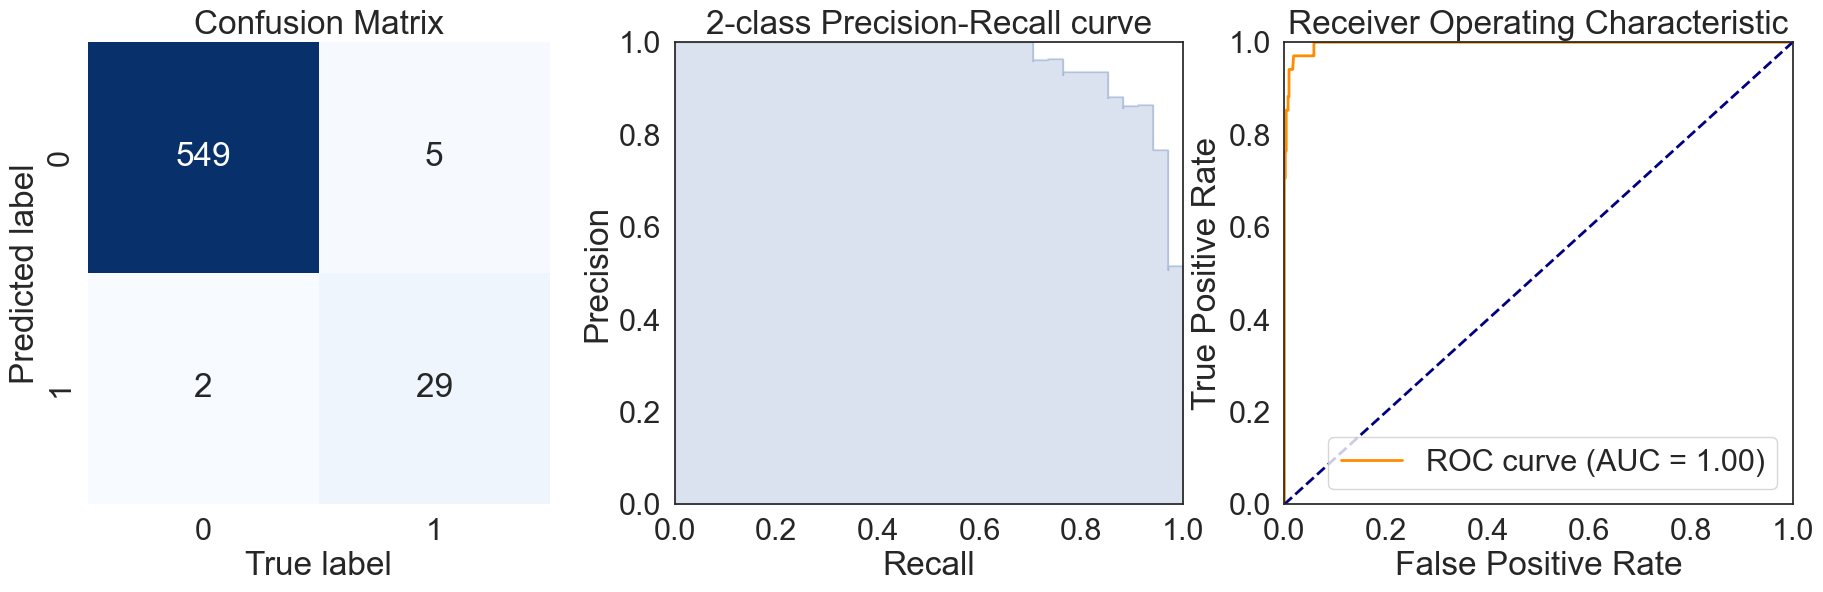

In [85]:
y_test_prob_gs = model_gs.predict_proba(X_test)[:,1]
show_summary_report(y_test, y_test_prob_gs)

Accuracy : 1.0000 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 1.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 1.0000 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 1.0000                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


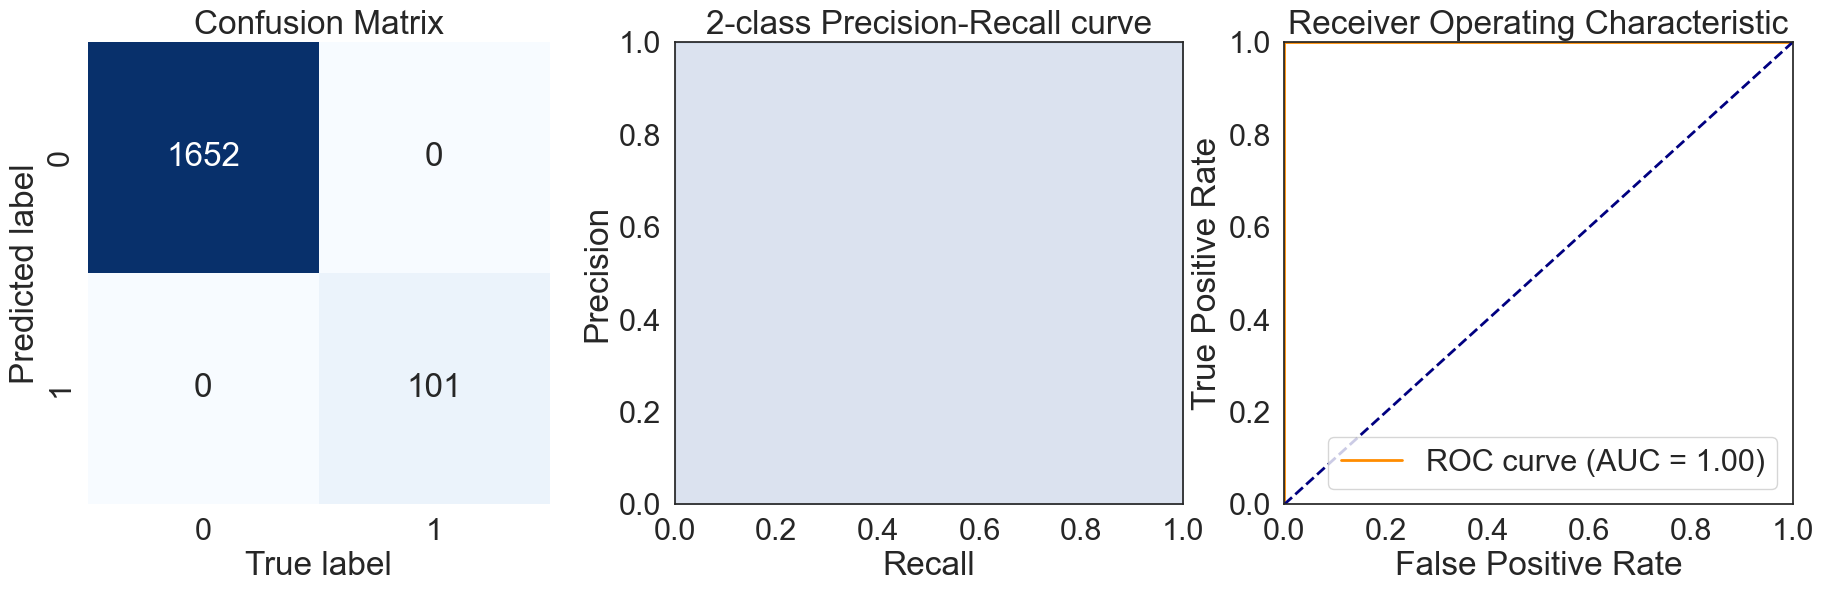

In [86]:
y_train_prob_gs = model_gs.predict_proba(X_train)[:,1]
show_summary_report(y_train, y_train_prob_gs)

The new parameter from GridSearch seems to work well. 

### Do cross validation

In [87]:
# Cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)

[0.98295455 0.99431818 0.98295455 0.97714286 0.96571429 0.98285714
 1.         0.99428571 0.97142857 0.99428571]


## 5. Unseen data

This unseen data is a new dataset containing patients with hypothyroidism. However, this dataset subgroups the patients into different classes of hypothyrodism. The columns of the data look the same. 


In [91]:
new_data = pd.read_csv('allhypo.data', header=None )
new_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,...,17,18,19,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [93]:
column_name = ['age',
'sex',
'on_thyroxine',
'query_on_thyroxine',
'on_antithyroid_medication',
'sick',
'pregnant',
'thyroid_surgery',
'I131_treatment',
'query_hypothyroid',
'query_hyperthyroid',
'lithium',
'goitre',
'tumor',
'hypopituitary',
'psych',
'TSH_measured',
'TSH',
'T3_measured',
'T3',
'TT4_measured',
'TT4',
'T4U_measured',
'T4U',
'FTI_measured',
'FTI',
'TBG_measured',
'TBG',
'referral_source',
'diagnosis']

new_data.columns = column_name
new_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,diagnosis
0,41,F,f,f,f,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [94]:
new_data['diagnosis'] = new_data['diagnosis'].str.split('.').str[0]

In [95]:
new_data['diagnosis'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [96]:
# I grouped all the classes into one class which which hypothyroid (1)
new_data['diagnosis_group'] = new_data['diagnosis'].map({
    'negative': 0,
    'compensated hypothyroid': 1,
    'primary hypothyroid':1,
    'secondary hypothyroid':1
})

In [97]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
diagnosis                    0
diagnosis_group              0
dtype: int64

In [98]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on_thyroxine               2800 non-null   object
 3   query_on_thyroxine         2800 non-null   object
 4   on_antithyroid_medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid_surgery            2800 non-null   object
 8   I131_treatment             2800 non-null   object
 9   query_hypothyroid          2800 non-null   object
 10  query_hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

Start cleaning the data and prepare to test the model.

In [99]:
(new_data == '?').sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
diagnosis     

In [100]:
for i in columns_to_numeric:
    #print(i)
    new_data[i] = pd.to_numeric(new_data[i], errors='coerce')

In [101]:
new_data.isna().sum()

age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          284
T3_measured                    0
T3                           585
TT4_measured                   0
TT4                          184
T4U_measured                   0
T4U                          297
FTI_measured                   0
FTI                          295
TBG_measured                   0
TBG                            0
referral_source                0
diagnosis                      0
diagnosis_

In [102]:
new_data = new_data.dropna(axis=0)


In [103]:
new_data.shape

(2029, 31)

In [104]:
new_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,diagnosis,diagnosis_group
0,41,F,f,f,f,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,f,?,SVHC,negative,0
4,70,F,f,f,f,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,f,?,SVI,negative,0
7,80,F,f,f,f,f,f,f,f,f,f,f,f,...,t,0.6,t,80.0,t,0.70,t,115.0,f,?,SVI,negative,0
8,66,F,f,f,f,f,f,f,f,f,f,f,f,...,t,2.2,t,123.0,t,0.93,t,132.0,f,?,SVI,negative,0
9,68,M,f,f,f,f,f,f,f,f,f,f,f,...,t,1.6,t,83.0,t,0.89,t,93.0,f,?,SVI,negative,0


In [105]:
for f in for_countplot:
    new_data[f] = new_data[f].map({'f':0,'t':1})

In [106]:
new_data.shape

(2029, 31)

In [107]:
new_data['sex'] = new_data['sex'].map({"M":0,"F":1})

In [108]:
new_data = new_data.dropna(axis=0)

In [109]:
(new_data == '?').sum()

age                             1
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
T4U_measured                    0
T4U                             0
FTI_measured                    0
FTI                             0
TBG_measured                    0
TBG                          1948
referral_source                 0
diagnosis     

In [110]:
new_data = new_data.drop(columns='TBG')


In [111]:
new_data = new_data.dropna(axis=0)

In [112]:
new_data = new_data[new_data['age'] != '?']

In [113]:
(new_data == '?').sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
diagnosis                    0
diagnosis_group              0
dtype: int64

In [114]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
diagnosis                    0
diagnosis_group              0
dtype: int64

In [115]:
new_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,diagnosis,diagnosis_group
0,41,1.0,0,0,0,0,0,0,f,0,0,0,0,...,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative,0
4,70,1.0,0,0,0,0,0,0,f,0,0,0,0,...,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative,0
7,80,1.0,0,0,0,0,0,0,f,0,0,0,0,...,2.20,t,0.6,t,80.0,t,0.70,t,115.0,f,SVI,negative,0
8,66,1.0,0,0,0,0,0,0,f,0,0,0,0,...,0.60,t,2.2,t,123.0,t,0.93,t,132.0,f,SVI,negative,0
9,68,0.0,0,0,0,0,0,0,f,0,0,0,0,...,2.40,t,1.6,t,83.0,t,0.89,t,93.0,f,SVI,negative,0


In [116]:
new_data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'diagnosis',
       'diagnosis_group'],
      dtype='object')

### Prepare the new X test and new y test.

In [120]:
new_X_test = new_data[features]

In [121]:
new_y_test = new_data['diagnosis_group']

In [122]:
new_y_test

0       0
4       0
7       0
8       0
9       0
       ..
2788    0
2790    0
2793    0
2794    0
2799    0
Name: diagnosis_group, Length: 1947, dtype: int64

### Fit the model trained earler and check the score.

In [123]:
new_y_test_prob_f = model.predict_proba(new_X_test)

In [124]:
new_y_test_proba = model.predict_proba(new_X_test)[:,1]

Accuracy : 0.9399 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.9167 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.2803 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.8049                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


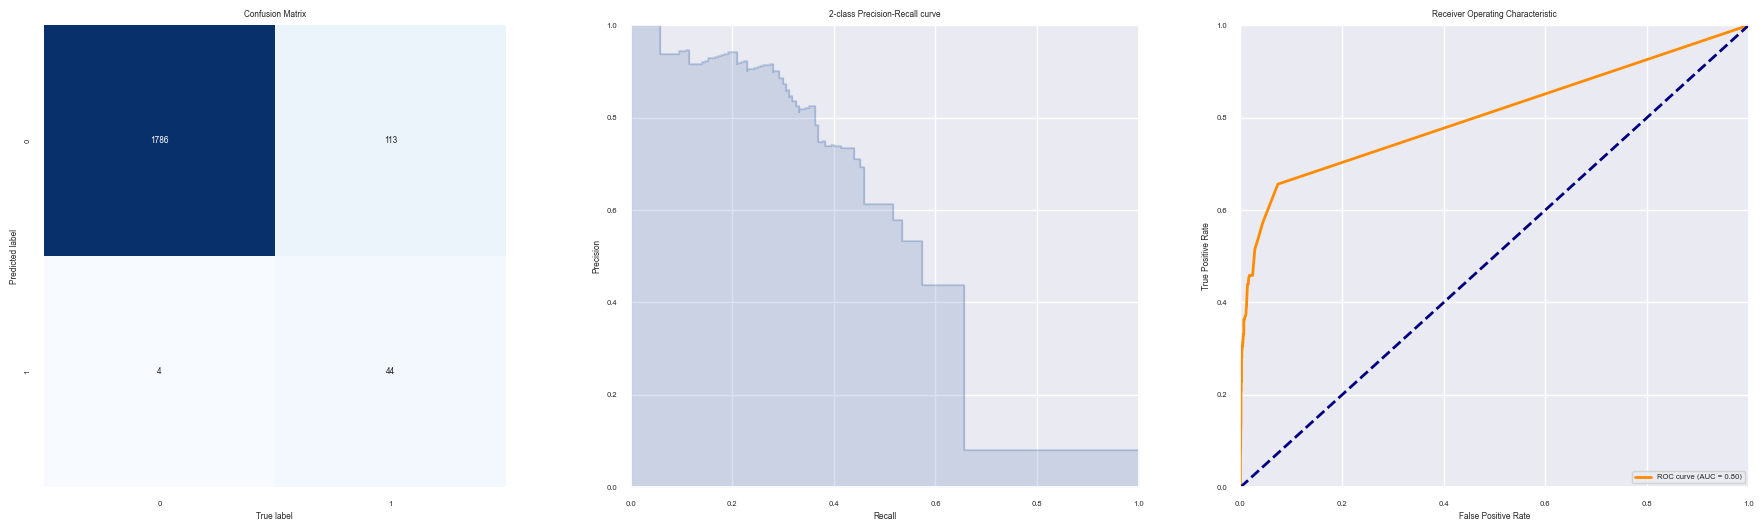

In [128]:
show_summary_report(new_y_test, new_y_test_proba)

The model seems to have a very low recall, predicting the patients with hypothyroidism to not have the disease. 

In [ ]:
new_y_test.value_counts(normalize=True)

diagnosis_group
0    0.919363
1    0.080637
Name: proportion, dtype: float64

## Figure out the data that are wrongly classified.

In [129]:
prediction = np.round(new_y_test_proba.astype(float))

In [130]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [131]:
a = np.array(new_y_test)

In [132]:
a = a.astype(float)

In [133]:
mask = a != prediction
indices = np.where(mask)

In [134]:
indices

(array([  22,   39,   40,   41,   64,  149,  179,  198,  201,  208,  240,
         262,  269,  277,  285,  295,  299,  300,  313,  317,  324,  334,
         355,  364,  373,  375,  391,  419,  450,  461,  463,  480,  524,
         543,  551,  558,  559,  583,  605,  614,  615,  636,  644,  678,
         729,  744,  753,  758,  770,  813,  815,  851,  862,  892,  895,
         939,  998, 1005, 1013, 1041, 1050, 1063, 1066, 1072, 1078, 1080,
        1128, 1136, 1137, 1140, 1144, 1158, 1159, 1170, 1177, 1183, 1189,
        1199, 1225, 1245, 1271, 1283, 1286, 1316, 1320, 1347, 1351, 1362,
        1366, 1380, 1436, 1454, 1456, 1457, 1479, 1518, 1532, 1550, 1554,
        1560, 1575, 1578, 1632, 1640, 1643, 1657, 1659, 1666, 1667, 1685,
        1701, 1722, 1819, 1823, 1862, 1914, 1931]),)

In [135]:
wrong_group = new_data.iloc[indices]

In [136]:
wrong_group[wrong_group['diagnosis_group'] == 1]['diagnosis'].value_counts()

diagnosis
compensated hypothyroid    104
primary hypothyroid          8
secondary hypothyroid        1
Name: count, dtype: int64

<Axes: xlabel='diagnosis_group', ylabel='TSH'>

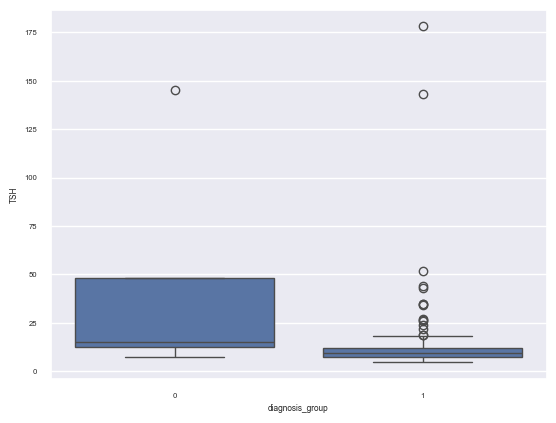

In [137]:
sns.boxplot(data=wrong_group, x='diagnosis_group', y='TSH')

<Axes: xlabel='diagnosis_group', ylabel='T3'>

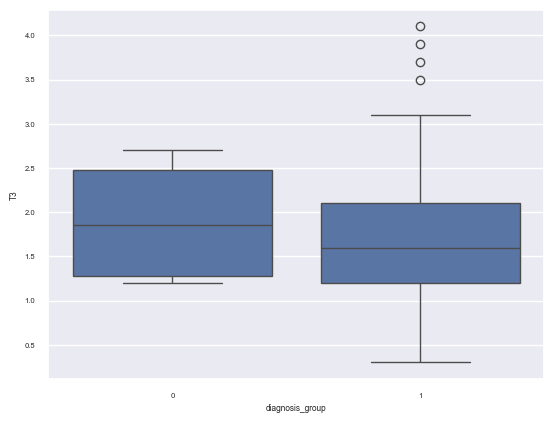

In [138]:
sns.boxplot(data=wrong_group, x='diagnosis_group', y='T3')

<Axes: xlabel='diagnosis_group', ylabel='TT4'>

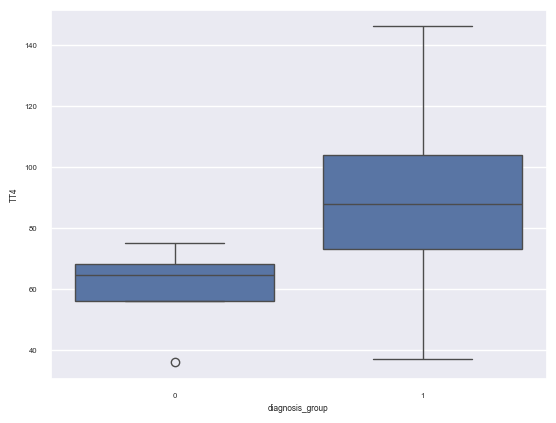

In [139]:
sns.boxplot(data=wrong_group, x='diagnosis_group', y='TT4')

<Axes: xlabel='diagnosis_group', ylabel='T4U'>

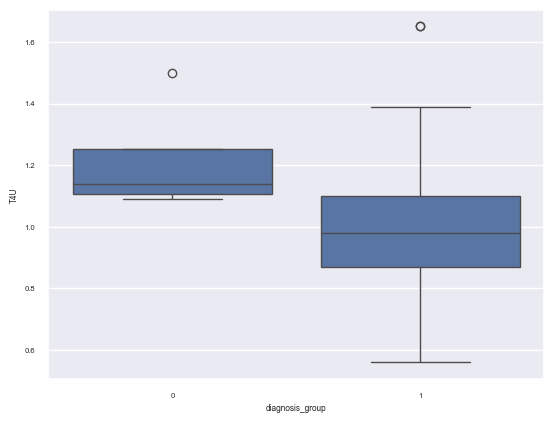

In [140]:
sns.boxplot(data=wrong_group, x='diagnosis_group', y='T4U')

<Axes: xlabel='diagnosis_group', ylabel='FTI'>

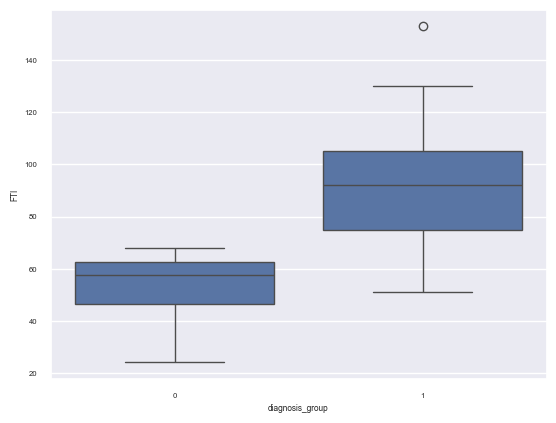

In [141]:
sns.boxplot(data=wrong_group, x='diagnosis_group', y='FTI')

In [148]:
wrong_group[wrong_group['diagnosis_group'] == 1]['diagnosis'].value_counts()

diagnosis
compensated hypothyroid    104
primary hypothyroid          8
secondary hypothyroid        1
Name: count, dtype: int64

Compared to the previous dataset, the patients that are wrongly classified have a different trend thier TSH and FTI. They all belong to the subgroup called compensated hypothyroid which are people with hypothyroid symptoms, but normal measurements for TSH and FTI hormones. 